<a href="https://colab.research.google.com/github/NishanthReddy7/Machine-Learning/blob/main/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## A1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Function to preprocess the data (select feature and target columns)
def preprocess_data(data, feature_column, target_column):
    X = data[[feature_column]]
    y = data[target_column]
    return X, y

# Load dataset
data = load_data("tesla_yfinance_data.csv")
X, y = preprocess_data(data, 'Open', 'Close')


In [3]:
## A2

# Function to split data into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)


In [5]:
## A3

# Function to train a linear regression model
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_regression(X_train, y_train)


In [6]:
## A4

# Function to make predictions using the trained model
def predict(model, X):
    return model.predict(X)

y_train_pred = predict(model, X_train)
y_test_pred = predict(model, X_test)


In [7]:
## A5

# Function to evaluate the model's performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

print(f"Training Data: MSE={train_mse}, RMSE={train_rmse}, R²={train_r2}")
print(f"Testing Data: MSE={test_mse}, RMSE={test_rmse}, R²={test_r2}")


Training Data: MSE=18.355242533327296, RMSE=4.284301872338981, R²=0.9940826935243358
Testing Data: MSE=14.899772671377324, RMSE=3.860022366693919, R²=0.9955391156065686


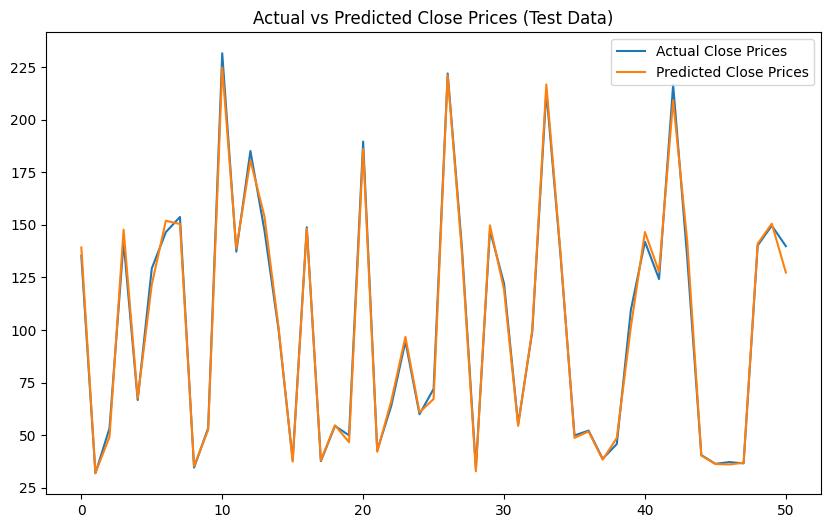

In [8]:
## A6

import matplotlib.pyplot as plt

# Plotting the real vs predicted Close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Prices')
plt.plot(y_test_pred, label='Predicted Close Prices')
plt.legend()
plt.title("Actual vs Predicted Close Prices (Test Data)")
plt.show()
